In [1]:
using Plots, Noise;

# Loss Functions

This is concerning Linear Regressions, using these as the loss functions:

- |X - X̂|³
- |X - X̂|


In [2]:
m = 3; c = 4 # For Linear Regression
println("This cell is to set params of original function, that is to be fit.")

This cell is to set params of original function, that is to be fit.


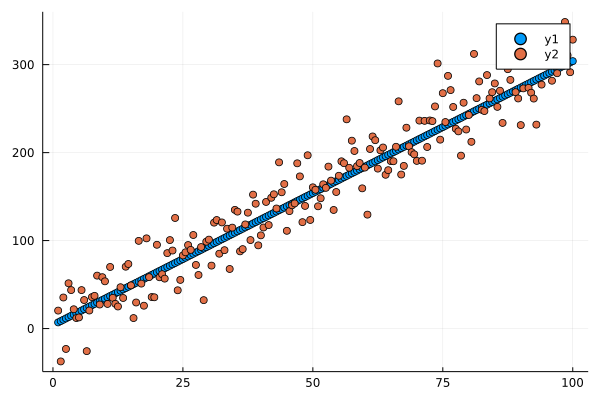

In [4]:
x = collect(1: 0.5: 100)
y = map(x -> m*x + c, x) # This is just representative, not using noise during comparison to prediction.
y_noise = add_gauss(y, 25)
plot(x, [y, y_noise], seriestype = :scatter)

In [5]:
f(x, w₁, b₁) = w₁*x + b₁ # Linear Definition
loss(t, ŷ, degree) = (abs(t - ŷ))^degree # Loss Function Definition
println("Defintions of functions")

Defintions of functions


# Linear Regression

In [6]:
function linear_grad_w(x, ŷ, y, deg)
    if y > ŷ
        return deg*(y - ŷ)^(deg-1)*(-x)
    else
        return deg*(y - ŷ)^(deg-1)*(x)
    end
end

function linear_grad_b(x, ŷ, y, deg)
    if y > ŷ
        return deg*(y - ŷ)^(deg-1)*(-1)
    else
        return deg*(y - ŷ)^(deg-1)
    end
end
println("Some Linear Regression Related Initialisations")

Some Linear Regression Related Initialisations


In [7]:
function model(x, y, deg, η, upto_error, w, b) 
    """
    w, b are initial values, η is the learning rate and upto_error is threshold below which we need the error to be. This algo is based on changing grad due to each data item, so fluctuations of error per iteration is large.
    """
    loss_now = 0
    while true
        for i = 1:length(x)
            ŷ = f(x[i], w, b)
            w = w - η*linear_grad_w(x[i], ŷ, y[i], deg)
            b = b - η*linear_grad_b(x[i], ŷ, y[i], deg)
            loss_now = loss(y[i], ŷ, deg)
            println("Loss: ", loss_now)
            if loss_now > 1e20 || loss_now == NaN
                return -1, -1, loss_now
            end
        end
        if loss_now < upto_error
            break
        end
    end
    return w, b, loss_now
end        

model (generic function with 1 method)

In [8]:
wᵢ = 0; bᵢ = 2.7; step_size = 1e-13
w, b, loss_final = model(x, y, 3, step_size, 10, wᵢ, bᵢ)
if w!=-1
    open("linear_regression.csv", "a") do file
        write(file, "final params: ($w, $b), loss: $loss_final, initial params: ($wᵢ, $bᵢ), error function: 3, step size: $step_size\n")
    end
else
    println("You got wrecked.")
end


Loss: 79.50699999999999
Loss: 195.1119986004919
Loss: 389.01699088597115
Loss: 681.4719620683014
Loss: 1092.7268768056476
Loss: 1643.031662292216
Loss: 2352.636183752755
Loss: 3241.790210906608
Loss: 4330.74337396617
Loss: 5639.745107734617
Loss: 7189.044582367823
Loss: 8998.890619365522
Loss: 11089.531591356754
Loss: 13481.215304244964
Loss: 16194.188860278127
Loss: 19248.698500609607
Loss: 22664.989425915825
Loss: 26463.30559363697
Loss: 30663.889490407608
Loss: 35286.98187824454
Loss: 40352.8215130599
Loss: 45881.644834068014
Loss: 51893.68562265584
Loss: 58409.1746292874
Loss: 65448.339167013735
Loss: 73031.40267016177
Loss: 81178.58421677635
Loss: 89910.09801339147
Loss: 99246.15284070917
Loss: 109206.95145876564
Loss: 119812.68997016773
Loss: 131083.5571399845
Loss: 143039.73367088204
Loss: 155701.39143209212
Loss: 169088.69264081115
Loss: 183221.78899462536
Loss: 198120.82075356712
Loss: 213805.91577040896
Loss: 230297.18846780658
Loss: 247614.7387609109
Loss: 265778.6509240701


Excessive output truncated after 524295 bytes.


Loss: 28202.776135089403
Loss: 28898.817061231384
Loss: 29606.100583321924
Loss: 30324.71005301771
Loss: 31054.728494575644
Loss: 31796.23859695487
Loss: 32549.32270580111
Loss: 33314.06281531432
Loss: 34090.540559998284
Loss: 34878.837206291944
Loss: 35679.03364408309
Loss: 36491.21037810264
Loss: 37315.44751920049
Loss: 38151.82477550268
Loss: 39000.42144344925
Loss: 39861.31639871163
Loss: 40734.58808699306
Loss: 41620.31451470673
Loss: 42518.5732395366
Loss: 43429.441360876874
Loss: 44352.995510153356
Loss: 45289.31184102383
Loss: 46238.46601946044
Loss: 47200.53321371094
Loss: 48175.58808414249
Loss: 49163.704772964506
Loss: 50164.95689383439
Loss: 51179.41752134266
Loss: 52207.15918038205
Loss: 53248.25383539529
Loss: 54302.772879508746
Loss: 55370.78712354553
Loss: 56452.36678492382
Loss: 57547.5814764367
Loss: 58656.50019491812
Loss: 59779.191309791124
Loss: 60915.72255150326
Loss: 62066.16099984581
Loss: 63230.5730721602
Loss: 64409.0245114314
Loss: 65601.58037426928
Loss: 66

145

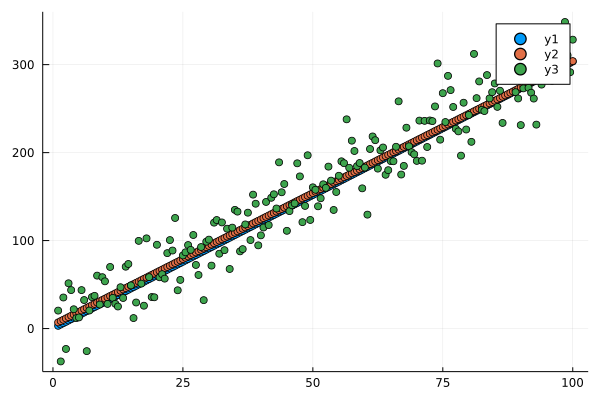

In [14]:
plot(x, [map(x->f(x, w, b), x), map(x->f(x, m, c), x), y_noise], seriestype=:scatter)

In [15]:
wᵢ = 0; bᵢ = 0; step_size = 1e-6
w, b, loss_final = model(x, y, 1, step_size, 1, wᵢ, bᵢ)
open("linear_regression.csv", "a") do file
    write(file, "final params: ($w, $b), loss: $loss_final, initial params: ($wᵢ, $bᵢ), error function: 1, step size: $step_size\n")
end

Loss: 7.0
Loss: 8.4999975
Loss: 9.999993
Loss: 11.49998575
Loss: 12.999975
Loss: 14.49996
Loss: 15.99994
Loss: 17.49991425
Loss: 18.999882
Loss: 20.4998425
Loss: 21.999795
Loss: 23.49973875
Loss: 24.999673
Loss: 26.499597
Loss: 27.99951
Loss: 29.49941125
Loss: 30.9993
Loss: 32.4991755
Loss: 33.999037
Loss: 35.49888375
Loss: 36.998715
Loss: 38.49853
Loss: 39.998328
Loss: 41.49810825
Loss: 42.99787
Loss: 44.4976125
Loss: 45.997335
Loss: 47.49703675
Loss: 48.996717
Loss: 50.496375
Loss: 51.99601
Loss: 53.49562125
Loss: 54.995208
Loss: 56.4947695
Loss: 57.994305
Loss: 59.49381375
Loss: 60.993295
Loss: 62.492748
Loss: 63.992172
Loss: 65.49156625
Loss: 66.99093
Loss: 68.4902625
Loss: 69.989563
Loss: 71.48883075
Loss: 72.988065
Loss: 74.487265
Loss: 75.98643
Loss: 77.48555925
Loss: 78.984652
Loss: 80.4837075
Loss: 81.982725
Loss: 83.48170375
Loss: 84.980643
Loss: 86.479542
Loss: 87.9784
Loss: 89.47721625
Loss: 90.97599
Loss: 92.4747205
Loss: 93.973407
Loss: 95.47204875
Loss: 96.970645
Loss: 9

Excessive output truncated after 524290 bytes.

146.9287122500004
Loss: 147.85714200000035
Loss: 148.78545650000035
Loss: 149.71365500000036
Loss: 150.64173675000038
Loss: 151.56970100000035
Loss: 152.49754700000037
Loss: 153.42527400000037
Loss: 154.3528812500004
Loss: 155.28036800000038
Loss: 156.20773350000036
Loss: 157.1349770000004
Loss: 158.0620977500004
Loss: 158.9890950000004
Loss: 159.9159680000004
Loss: 160.8427160000004
Loss: 161.7693382500004
Loss: 162.6958340000004
Loss: 163.6222025000004
Loss: 164.54844300000042
Loss: 165.47455475000044
Loss: 166.40053700000044
Loss: 167.3263890000004
Loss: 168.2521100000004
Loss: 169.17769925000042
Loss: 170.1031560000004
Loss: 171.02847950000043
Loss: 171.95366900000042
Loss: 172.87872375000043
Loss: 173.80364300000042
Loss: 174.7284260000004
Loss: 175.65307200000046
Loss: 176.57758025000044
Loss: 177.50195000000042
Loss: 178.42618050000044
Loss: 179.35027100000048
Loss: 180.27422075000047
Loss: 181.19802900000047
Loss: 182.12169500000047
Loss: 183.04521800000046
Loss: 183.9685972500

146

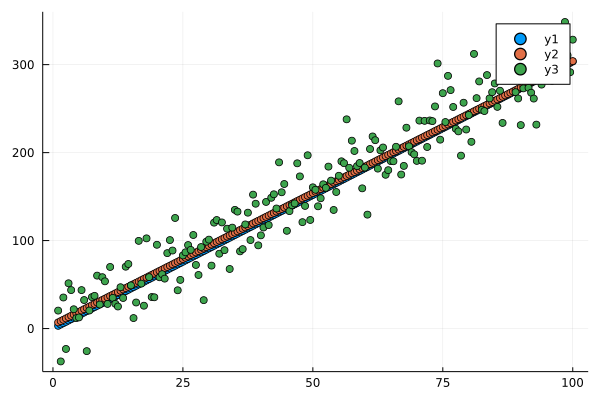

In [18]:
plot(x, [map(x->f(x, w, b), x), map(x->f(x, m, c), x), y_noise], seriestype=:scatter)